#### Setup

In [1]:
from main_functions.dataloader import dataloader
from data_tsinghua import get_data
from main_functions.plots import hartley_fourier, plot_slices, plot_coefs
from main_functions.slicing import dataslicing
from main_functions.datasplitting import splitting, splitting_per_trial
from main_functions.windowing import windowing
from main_functions.preprocessing import dataprocessing
from main_functions.DHT import dataDHT
from main_functions.DFT import dataDFT
from main_functions.pooling import datapooling
from main_functions.utils import NormalizeData, to_categorical, NormalizeData_

import random
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split

#### Loading data for plotting

##### 10/20 International System

![alt text](10-20_system.png)

In [3]:
datapath = ("/home/natalia/Documentos/Dados/Tsinghua BCI Lab - Benchmark Dataset/")

In [7]:
suj = 12
elec = 27 #18 #61
tr = 1
seconds_off = 0


signals15, labels15 = dataloader(subject=suj, electrode=elec, stimulus_frequency=[15], trial=tr, sec_off=seconds_off, path=datapath)
signals10, labels10 = dataloader(subject=suj, electrode=elec, stimulus_frequency=[10], trial=tr, sec_off=seconds_off, path=datapath)
signals8, labels8= dataloader(subject=suj, electrode=elec, stimulus_frequency=[8], trial=tr, sec_off=seconds_off, path=datapath)
signals12, labels12 = dataloader(subject=suj, electrode=elec, stimulus_frequency=[12], trial=tr, sec_off=seconds_off, path=datapath)

print(signals15.shape, signals10.shape, signals8.shape, signals12.shape)

(1, 1, 1500, 1) (1, 1, 1500, 1) (1, 1, 1500, 1) (1, 1, 1500, 1)


#### Plotting the input signal

In [8]:
# Create a simple plot
fig = go.Figure()
t=t = np.arange(0,signals15.shape[2]) / 250 # plot in time
fig.add_trace(go.Scatter(x=t, y=np.reshape(signals15, (signals15.shape[2])), mode='lines', name='With CAR')) #np.reshape(signal, (signal.shape[1]))

# Update layout
fig.update_layout(
    title='15 Hertz Input',
    xaxis=dict(title='Time (s)'),
    yaxis=dict(title='Amplitude'),
    template='plotly_white'
)
# Show the plot
fig.show()

#### Plotting the signal and its Fourier and Hartley Transforms after CAR

In [9]:
s = [signals8, signals10, signals12, signals15]
sf = [8, 10, 12, 15]

for idx, signal in enumerate(s):
    hartley_fourier(signal=np.reshape(signal, (signal.shape[2])), stimulus_frequency=sf[idx], sampling_frequency=250)

#### Slicing the signal

In [56]:
print('Forma do sinal de entrada:', signals15.shape)
signals15_blks = dataslicing(data=signals15, levels=3)
print('Número de blocos após fatiamento:', len(signals15_blks))

for blk in signals15_blks:
    print('Tamanho do bloco:', blk.shape)
concat = np.concatenate(signals15_blks, axis=2)

Forma do sinal de entrada: (1, 1, 1500, 1)
nivel: 0
nivel: 1
nivel: 2
Número de blocos após fatiamento: 21
Tamanho do bloco: (1, 1, 1500, 1)
Tamanho do bloco: (1, 1, 375, 1)
Tamanho do bloco: (1, 1, 375, 1)
Tamanho do bloco: (1, 1, 375, 1)
Tamanho do bloco: (1, 1, 375, 1)
Tamanho do bloco: (1, 1, 93, 1)
Tamanho do bloco: (1, 1, 93, 1)
Tamanho do bloco: (1, 1, 93, 1)
Tamanho do bloco: (1, 1, 93, 1)
Tamanho do bloco: (1, 1, 93, 1)
Tamanho do bloco: (1, 1, 93, 1)
Tamanho do bloco: (1, 1, 93, 1)
Tamanho do bloco: (1, 1, 93, 1)
Tamanho do bloco: (1, 1, 93, 1)
Tamanho do bloco: (1, 1, 93, 1)
Tamanho do bloco: (1, 1, 93, 1)
Tamanho do bloco: (1, 1, 93, 1)
Tamanho do bloco: (1, 1, 93, 1)
Tamanho do bloco: (1, 1, 93, 1)
Tamanho do bloco: (1, 1, 93, 1)
Tamanho do bloco: (1, 1, 93, 1)


In [7]:
plot_slices(concat)

#### Applying the DHT and pooling

In [57]:
grouped = []

for block in range(len(signals15_blks)):
    dhtdata = dataDHT(signals15_blks[block])
    print('Tamanho após transformada:', dhtdata.shape)
    datapool = datapooling(dhtdata, axis=2, width=1)
    print('Tamanho após agrupamento:', datapool.shape)
    grouped.append(datapool)
groupeddata = jnp.concatenate(grouped, axis=2)
print('Tamanho do sinal com blocos concatenados:', groupeddata.shape)
norm_groupeddata = NormalizeData(groupeddata)

Tamanho após transformada: (1, 1, 1500, 1)
Tamanho após agrupamento: (1, 1, 1500, 1)
Tamanho após transformada: (1, 1, 375, 1)
Tamanho após agrupamento: (1, 1, 375, 1)
Tamanho após transformada: (1, 1, 375, 1)
Tamanho após agrupamento: (1, 1, 375, 1)
Tamanho após transformada: (1, 1, 375, 1)
Tamanho após agrupamento: (1, 1, 375, 1)
Tamanho após transformada: (1, 1, 375, 1)
Tamanho após agrupamento: (1, 1, 375, 1)
Tamanho após transformada: (1, 1, 93, 1)
Tamanho após agrupamento: (1, 1, 93, 1)
Tamanho após transformada: (1, 1, 93, 1)
Tamanho após agrupamento: (1, 1, 93, 1)
Tamanho após transformada: (1, 1, 93, 1)
Tamanho após agrupamento: (1, 1, 93, 1)
Tamanho após transformada: (1, 1, 93, 1)
Tamanho após agrupamento: (1, 1, 93, 1)
Tamanho após transformada: (1, 1, 93, 1)
Tamanho após agrupamento: (1, 1, 93, 1)
Tamanho após transformada: (1, 1, 93, 1)
Tamanho após agrupamento: (1, 1, 93, 1)
Tamanho após transformada: (1, 1, 93, 1)
Tamanho após agrupamento: (1, 1, 93, 1)
Tamanho após tra

#### Applying the DFT and pooling

In [58]:
groupeddft = []

for block in range(len(signals15_blks)):
    dftdata = dataDFT(signals15_blks[block])
    print('Tamanho após transformada:', dftdata.shape)
    datapooldft = datapooling(dftdata, axis=2, width=1)
    print('Tamanho após agrupamento:', datapooldft.shape)
    groupeddft.append(datapooldft)
groupeddatadft = jnp.concatenate(groupeddft, axis=2)
print('Tamanho do sinal com blocos concatenados:', groupeddatadft.shape)
norm_groupeddatadft = NormalizeData(groupeddatadft)

Tamanho após transformada: (1, 1, 1500, 1)
Tamanho após agrupamento: (1, 1, 1500, 1)
Tamanho após transformada: (1, 1, 375, 1)
Tamanho após agrupamento: (1, 1, 375, 1)
Tamanho após transformada: (1, 1, 375, 1)
Tamanho após agrupamento: (1, 1, 375, 1)
Tamanho após transformada: (1, 1, 375, 1)
Tamanho após agrupamento: (1, 1, 375, 1)
Tamanho após transformada: (1, 1, 375, 1)
Tamanho após agrupamento: (1, 1, 375, 1)
Tamanho após transformada: (1, 1, 93, 1)
Tamanho após agrupamento: (1, 1, 93, 1)
Tamanho após transformada: (1, 1, 93, 1)
Tamanho após agrupamento: (1, 1, 93, 1)
Tamanho após transformada: (1, 1, 93, 1)
Tamanho após agrupamento: (1, 1, 93, 1)
Tamanho após transformada: (1, 1, 93, 1)
Tamanho após agrupamento: (1, 1, 93, 1)
Tamanho após transformada: (1, 1, 93, 1)
Tamanho após agrupamento: (1, 1, 93, 1)
Tamanho após transformada: (1, 1, 93, 1)
Tamanho após agrupamento: (1, 1, 93, 1)
Tamanho após transformada: (1, 1, 93, 1)
Tamanho após agrupamento: (1, 1, 93, 1)
Tamanho após tra

#### Plotting the final coefficients

In [59]:
plot_coefs(norm_groupeddata, norm_groupeddatadft)

#### Loading data for splitting 

In [2]:
sel_electrodes = {
    60: "O1",
    61: "Oz",
    62: "O2",
    55: "POz",
    47: "Pz",
    54: "PO3",
    56: "PO4",
    52: "PO7",
    58: "PO8",
    46: "P1",
    48: "P2",
    27: "Cz",
    26: "C1",
    28: "C2",
    37: "CPZ",
    18: "FCz",
}
"""
sel_electrodes = {
    61: "O1",
    62: "Oz",
    63: "O2",
    56: "POz",
    48: "Pz",
    50: "P4",
    46: "P3",
    55: "PO3",
    57: "PO4",
    53: "PO7",
    59: "PO8",
    47: "P1",
    49: "P2",
}"""
stimulif = [8, 10, 12, 15]  # [8,9.4,10.8,12.2,13.6,15]
subjects = [1] #np.random.randint(1, 36, 35)
dados = ("/home/natalia/Documentos/Dados/Tsinghua BCI Lab - Benchmark Dataset/")

In [24]:
eegdata, eeglabels = dataloader(
        subject=subjects[0],
        electrode=sel_electrodes,
        stimulus_frequency=stimulif,
        trial=False,
        sec_off=0.5,
        path=dados,
    )
eegdata.shape, eeglabels.shape

((16, 4, 1250, 6), (4, 6))

In [25]:
eegdata.min()

Array(-44.654045, dtype=float32)

In [26]:
eegdata.max()

Array(44.12352, dtype=float32)

#### Testing functions

In [4]:
def window(data, window_size, shift):
    freq = eegdata.shape[1]
    window_size*=250
    shift*=250
    arr = []
    n=0
    for k in range(0,data.shape[2]+1, shift):
        if k+window_size <= data.shape[2]:
            arr.append(data[...,k:(k+window_size),:])
            n+=1
    return jnp.concatenate(arr, axis=-1), n

eeg_data, janelas = window(eegdata,2,1)

In [7]:
wnds = windowing(eegdata, window=2, overlap=1)

0 500
250 750
500 1000
750 1250


In [12]:
def create_labels(data):
    a,freq,b,trial = data.shape
    return [[x for x in range(freq)] for _ in range(trial)]

In [30]:

def get_correct_data(data, label, num_trial=6):
    x_data = []
    y_data = []
    trial_number = []
    for trial in range(len(label)): #label tem tamanho trial*janelamento (ex 6*4=24)
        for l in label[trial]: #label[trial] acessa label que tem tamanho trial*janelamento na posicao da variavel trial que vai ser um vetor [0,1,2,3,4,5]
            x_data.append(data[:,l,:,trial]) #pega o dado com todos eletrodos e amostras de tempo no idx da frequencia l e trial
            y_data.append(l) #appenda na mesma posicao do x_data, o label de frequencia q ele pegou ali em cima
            trial_number.append(trial%num_trial) #appenda no gabarito o trial
    tx = list(map(lambda x: x.reshape(1,x.shape[0],x.shape[1]), x_data)) #cada elemento tx eh do shape (13,500) e tem trial*janelas*freqs elementos na lista
    
    return jnp.concatenate(tx, axis=0), np.array(y_data), trial_number

In [31]:
tx, ty, tz = get_correct_data(eeg_data, a)

In [22]:
tx = list(map(lambda x: x.reshape(1,x.shape[0],x.shape[1]), tx)) #cada elemento tx eh do shape (13,500) e tem trial*janelas*freqs elementos na lista
#dou um reshape pra ficar (1,13,500) e concatenar embaixo
tx = jnp.concatenate(tx, axis=0)

In [23]:
tx = dataDFT(tx)

In [35]:
processed_data, processed_labels, ntrials = dataprocessing(
    data=eegdata,
    n_levels=1,
    band_width=1,
    transform="DHT",
    window=3,
    overlap=2        
)

0 750
250 1000
500 1250
nivel: 0
grouped shape: (16, 4, 750, 18)


In [36]:
processed_data.shape

(72, 16, 750)

In [37]:
processed_labels.shape

(72,)

In [40]:
processed_data[0,0].shape

(750,)

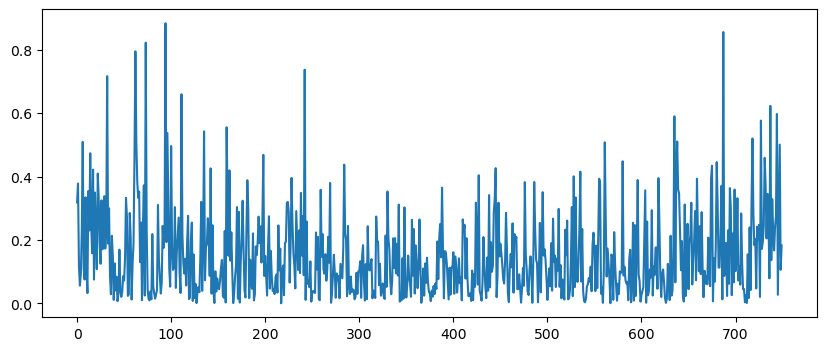

In [44]:
plt.figure(figsize=(10,4))
N=len(processed_data[0,0])
frequencies = np.arange(0,N) * (250/N)
plt.plot(processed_data[0,0])

In [35]:
ty=np.array(ty)
tx = tx.reshape(tx.shape[0],-1) #junto (x,13,500) pra ficar (x,13*500)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
trials_train, trials_test = train_test_split([0,1,2,3,4,5], test_size=1/6, shuffle=False) #splito por id de trial

In [20]:
trials_train = [0,1,3,5]
trials_test = [4]
trials_val = [2]

In [11]:
def get_splits(x_all, y_all, split_train, split_test,trial_gab, num_trials=6):
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    all_idxs = np.array(trial_gab) #gabarito dos trials por linha
    for trial in split_train:
        x_train.append(x_all[all_idxs==trial]) #appendo os dados onde bate o valor com o do trial do split
        y_train.append(y_all[all_idxs==trial]) #msm coisa
    for trial in split_test:
            x_test.append(x_all[all_idxs==trial])
            y_test.append(y_all[all_idxs==trial])
    return jnp.concatenate(x_train, axis=0),jnp.concatenate(x_test, axis=0),jnp.concatenate(y_train, axis=0),jnp.concatenate(y_test, axis=0)

In [21]:
def get_splits(data, labels, split_train, split_val, split_test, trial_gab):
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    x_val = []
    y_val = []
    all_idxs = jnp.array(trial_gab) #gabarito dos trials por linha
    for trial in split_train:
      x_train.append(data[all_idxs==trial]) #appendo os dados onde bate o valor com o do trial do split
      y_train.append(labels[all_idxs==trial]) #msm coisa
    for trial in split_test:
      x_test.append(data[all_idxs==trial])
      y_test.append(labels[all_idxs==trial])
    for trial in split_val:
      x_val.append(data[all_idxs==trial])
      y_val.append(labels[all_idxs==trial])
    
    if x_val == []:
      return jnp.concatenate(x_train, axis=0),jnp.concatenate(x_test, axis=0), jnp.concatenate(y_train, axis=0), jnp.concatenate(y_test, axis=0)
    else:
      return jnp.concatenate(x_train, axis=0), jnp.concatenate(x_val, axis=0), jnp.concatenate(x_test, axis=0), jnp.concatenate(y_train, axis=0), jnp.concatenate(y_val, axis=0), jnp.concatenate(y_test, axis=0)
  

In [22]:
x_train, x_val, x_test, y_train, y_val, y_test = get_splits(processed_data.reshape(processed_data.shape[0],-1), processed_labels, trials_train, trials_val, trials_test, ntrials)

#### SVM - test

In [8]:
x_train, x_test, y_train, y_test = get_data(
                dados, sel_electrodes, stimulif, subjects[0], validation_set=False,
                n_levels = 1, band_width=1, transform = "DHT", sec_off = 0.5,
                split_train=[0, 1, 2, 3, 5], split_val=[], split_test=[4], 
                window=3, overlap=1, n_classes=4)

0 750
500 1250
nivel: 0


In [13]:
x_train.shape

(40, 12000)

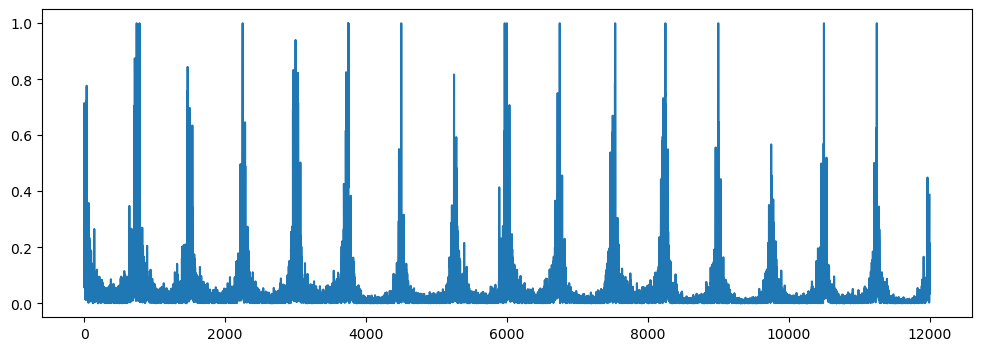

In [9]:
plt.figure(figsize=(12,4))
plt.plot(x_train[2])

In [10]:
#determina qual o melhor parametro para o classificador
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit #divisão cross validation


# Convert one-hot encoded labels to integer labels
y_train_int = np.argmax(y_train, axis=1) #y_train 
y_test_int = np.argmax(y_test, axis=1) #y_test #

svc = SVC()

parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["sigmoid"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]}
]

#divide a validação cruzada
tam = np.size(x_train,0) - np.size(x_test,0)                                    #desconsidera o tamanho do bloco de validação
cv1 = (np.ones(tam))*(-1)                                                         #para cada trial do treino é atribuido o rótulo -1
cv2 = np.zeros(np.size(x_test,0))                                                #para cada trial da validação é atribuido o rótulo 0
cv_concatenado = np.concatenate(((cv1),cv2), axis=0).astype(int).tolist()         #concatena em uma única lista
print(len(cv_concatenado))

num = len(cv2)                                                                    #define o deslocamento para a criação do Kfold
trial_cv = int((len(cv_concatenado)/num) + 1)                                     #define quantidade de trials nos dados de treino + validação
#trial_cv = 3

#armazena os parametros e desempenho dos treinos
parametro = []
desempenho = []

#varia o conjunto de treino e validação
for n in range (1, trial_cv):
  desloc = num*n
  cv_final = np.roll(cv_concatenado, desloc)                                      #desloca os rotulos referente ao conjunto de validação
  print(cv_final)

  pds = PredefinedSplit(test_fold = cv_final)                                     #organiza os grupos para a validação cruzada conforme as rotulações anteriores

  clf = GridSearchCV(estimator=svc, param_grid= parameters, cv = pds, scoring='accuracy')

  #treino do modelo
  clf.fit(x_train, y_train_int)

  means = clf.cv_results_['mean_test_score']
  params = clf.cv_results_['params']                                       
  parametro.append(params)
  desempenho.append(means)


print(parametro)
print(desempenho)

40
[ 0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0]
[[{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}, {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}, {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}, {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}, {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}, {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}, {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.

In [11]:
import pandas as pd
tam_dict = len(parametro[0])

tabela = pd.DataFrame([parametro[0][0]]) #pega apenas o primeiro dicionário, pois o restante se repete
for dicti in range(1,tam_dict):
  print(parametro[0][dicti])
  #tabela = tabela.append(parametro[0][dicti] , ignore_index=True)
#tabela

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
{'C': 1, 'gamma': 0.001, 'kernel': 'sigmoid'}
{'C': 1, 'gamma': 0.0001, 'kernel': 'sigmoid'}
{'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'}
{'C': 10, 'gamma': 0.0001, 'kernel': 'sigmoid'}
{'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid'}
{'C': 100, 'gamma': 0.0001, 'kernel': 'sigmoid'}
{'C': 1000, 'gamma': 0.001, 'kernel': 'sigmoid'}
{'C': 1000, 'gamma': 0.0001, 'kernel': 'sigmoid'}
{'C': 1, 'kernel': 'linear'}
{'C': 10, 'kernel': 'linear'}
{'C': 100, 'kernel': 'linear'}
{'C': 1000, 'kernel': 'linear'}


In [12]:
#Monta tabela de desempenho
tab_desempenho = pd.DataFrame(list(desempenho[0]), columns = ['Trial_'+ str(0)])

tam_desempenho = len(desempenho)
for colum in range (1,tam_desempenho):
  tab_desempenho['Trial_'+ str(colum)] = list(desempenho[colum])

#Calcula média de cada combinação
media = []
for linha in tab_desempenho.index:
  media.append(tab_desempenho.loc[linha].mean())

tab_desempenho['Média'] = media
tab_desempenho

,Trial_0,Trial_1,Trial_2,Trial_3,Trial_4,Média
0,0.875,0.750,0.625,0.875,0.500,0.725
1,0.875,0.750,0.625,0.875,0.500,0.725
2,0.750,0.875,0.625,0.750,0.375,0.675
3,0.875,0.750,0.625,0.875,0.500,0.725
4,0.750,0.875,0.625,0.750,0.375,0.675
5,0.750,0.875,0.625,0.750,0.375,0.675
6,0.750,0.875,0.625,0.750,0.375,0.675
7,0.750,0.875,0.625,0.750,0.375,0.675
8,0.875,0.750,0.625,0.875,0.500,0.725
9,0.875,0.750,0.625,0.875,0.500,0.725
